# Preprocessing

Loading the data and performing some initial exploration on it to acquire some basic knowledge about the data, how the various features are distributed.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns

# Warnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_energydata.csv")
dataset.head().T

0                    1                    2  \
date_time     2016-01-11 17:00:00  2016-01-11 17:10:00  2016-01-11 17:20:00   
a_energy                       60                   60                   50   
l_energy                       30                   30                   30   
kitchen_temp                19.89                19.89                19.89   
kitchen_hum             47.596667            46.693333                 46.3   
liv_temp                     19.2                 19.2                 19.2   
liv_hum                     44.79              44.7225            44.626667   
laun_temp                   19.79                19.79                19.79   
laun_hum                    44.73                44.79            44.933333   
off_temp                     19.0                 19.0            18.926667   
off_hum                 45.566667              45.9925                45.89   
bath_temp               17.166667            17.166667            17.166667   
bath_hum                     55.2                 55.2                55.09   
out_b_temp               7.026667             6.833333                 6.56   
out_b_hum               84.256667            84.063333            83.156667   
iron_temp                    17.2                 17.2                 17.2   
iron_hum                41.626667                41.56            41.433333   
teen_temp                    18.2                 18.2                 18.2   
teen_hum                     48.9            48.863333                48.73   
par_temp                17.033333            17.066667                 17.0   
par_hum                     45.53                45.56                 45.5   
out_temp                      6.6             6.483333             6.366667   
out_press                   733.5                733.6                733.7   
out_hum                      92.0                 92.0                 92.0   
wind                          7.0             6.666667             6.333333   
visibility                   63.0            59.166667            55.333333   
dew_point                     5.3                  5.2                  5.1   
rv1                     13.275433            18.606195            28.642668   
rv2                     13.275433            18.606195            28.642668   

                                3                    4  
date_time     2016-01-11 17:30:00  2016-01-11 17:40:00  
a_energy                       50                   60  
l_energy                       40                   40  
kitchen_temp                19.89                19.89  
kitchen_hum             46.066667            46.333333  
liv_temp                     19.2                 19.2  
liv_hum                     44.59                44.53  
laun_temp                   19.79                19.79  
laun_hum                     45.0                 45.0  
off_temp                    18.89                18.89  
off_hum                 45.723333                45.53  
bath_temp               17.166667                 17.2  
bath_hum                    55.09                55.09  
out_b_temp               6.433333             6.366667  
out_b_hum               83.423333            84.893333  
iron_temp               17.133333                 17.2  
iron_hum                    41.29                41.23  
teen_temp                    18.1                 18.1  
teen_hum                    48.59                48.59  
par_temp                     17.0                 17.0  
par_hum                      45.4                 45.4  
out_temp                     6.25             6.133333  
out_press                   733.8                733.9  
out_hum                      92.0                 92.0  
wind                          6.0             5.666667  
visibility                   51.5            47.666667  
dew_point                     5.0                  4.9  
rv1                     45.410389            10.084097  
rv2     

<a id="checking"></a>
## Outliers and missing values

### Analysing the Light Energy Consumption Column

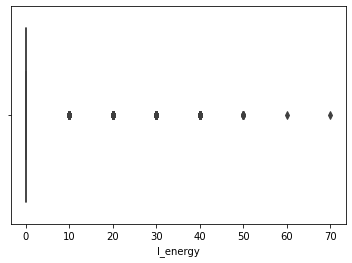

In [4]:
lights_box = sns.boxplot(dataset.l_energy)

In [5]:
lst = [0, 10, 20, 30, 40, 50, 60, 70]
counts = []

for i in lst:
    a = (dataset.l_energy == i).sum()
    counts.append(a)

print(counts)

[15252, 2212, 1624, 559, 77, 9, 1, 1]


Text(0.5, 1.0, 'Distribution of Energy Consumed by Lights')

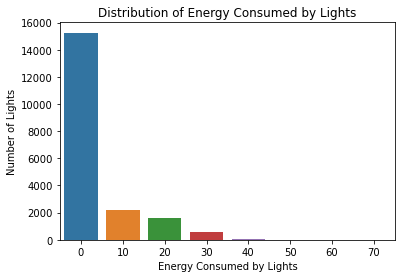

In [6]:
lights = sns.barplot(x=lst, y=counts)
lights.set_xlabel("Energy Consumed by Lights")
lights.set_ylabel("Number of Lights")
lights.set_title("Distribution of Energy Consumed by Lights")

In [7]:
((dataset.l_energy == 0).sum() / (dataset.shape[0])) * 100

77.28401317456296

77% of the instances have 0 Wh. This renders the l_energy column useless because we can't possibly find any links between it and the other data.

In [8]:
new_data = dataset
new_data.drop(["l_energy"], axis=1, inplace=True)

new_data.head().T

0                    1                    2  \
date_time     2016-01-11 17:00:00  2016-01-11 17:10:00  2016-01-11 17:20:00   
a_energy                       60                   60                   50   
kitchen_temp                19.89                19.89                19.89   
kitchen_hum             47.596667            46.693333                 46.3   
liv_temp                     19.2                 19.2                 19.2   
liv_hum                     44.79              44.7225            44.626667   
laun_temp                   19.79                19.79                19.79   
laun_hum                    44.73                44.79            44.933333   
off_temp                     19.0                 19.0            18.926667   
off_hum                 45.566667              45.9925                45.89   
bath_temp               17.166667            17.166667            17.166667   
bath_hum                     55.2                 55.2                55.09   
out_b_temp               7.026667             6.833333                 6.56   
out_b_hum               84.256667            84.063333            83.156667   
iron_temp                    17.2                 17.2                 17.2   
iron_hum                41.626667                41.56            41.433333   
teen_temp                    18.2                 18.2                 18.2   
teen_hum                     48.9            48.863333                48.73   
par_temp                17.033333            17.066667                 17.0   
par_hum                     45.53                45.56                 45.5   
out_temp                      6.6             6.483333             6.366667   
out_press                   733.5                733.6                733.7   
out_hum                      92.0                 92.0                 92.0   
wind                          7.0             6.666667             6.333333   
visibility                   63.0            59.166667            55.333333   
dew_point                     5.3                  5.2                  5.1   
rv1                     13.275433            18.606195            28.642668   
rv2                     13.275433            18.606195            28.642668   

                                3                    4  
date_time     2016-01-11 17:30:00  2016-01-11 17:40:00  
a_energy                       50                   60  
kitchen_temp                19.89                19.89  
kitchen_hum             46.066667            46.333333  
liv_temp                     19.2                 19.2  
liv_hum                     44.59                44.53  
laun_temp                   19.79                19.79  
laun_hum                     45.0                 45.0  
off_temp                    18.89                18.89  
off_hum                 45.723333                45.53  
bath_temp               17.166667                 17.2  
bath_hum                    55.09                55.09  
out_b_temp               6.433333             6.366667  
out_b_hum               83.423333            84.893333  
iron_temp               17.133333                 17.2  
iron_hum                    41.29                41.23  
teen_temp                    18.1                 18.1  
teen_hum                    48.59                48.59  
par_temp                     17.0                 17.0  
par_hum                      45.4                 45.4  
out_temp                     6.25             6.133333  
out_press                   733.8                733.9  
out_hum                      92.0                 92.0  
wind                          6.0             5.666667  
visibility                   51.5            47.666667  
dew_point                     5.0                  4.9  
rv1                     45.410389            10.084097  
rv2                     45.410389            10.084097

### Analysing the Appliances Energy Consumption Column

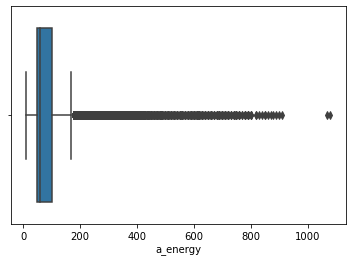

In [9]:
app_box = sns.boxplot(new_data.a_energy)

A majority of the values seem to lie between 50 Wh and 100 Wh. However, some values extend the upper bracket of 200 Wh and go beyond 1000 Wh.

In [10]:
# Check to see how many values extend above 200 Wh.
out = (new_data["a_energy"] > 200).sum()
out

1916

In [11]:
# The percentage of the number of instances wherein the value
# of the energy consumed by appliances is above 200 Wh
(out / 19735) * 100

9.708639473017481

In [12]:
# The total number of instances wherein the value of the energy
# consumed by appliances is above 950 Wh.
out_e = (new_data["a_energy"] > 950).sum()
out_e

2

In [13]:
# The percentage of the number of instances wherein the value of
# the energy consumed by appliances is above 950 Wh.
(out_e / 19735) * 100

0.010134279199391943

Only 0.01% of the instances have a_energy above 950 Wh. Close to 10% of the instances have a_energy above 200 Wh. Deleting (for now).

In [14]:
energy = new_data[(new_data["a_energy"] <= 200)]
energy.describe()

a_energy  kitchen_temp   kitchen_hum      liv_temp       liv_hum  \
count  17819.000000  17819.000000  17819.000000  17819.000000  17819.000000   
mean      68.728324     21.687676     40.158323     20.294921     40.470961   
std       31.378141      1.605252      3.933742      2.172435      4.062130   
min       10.000000     16.790000     27.023333     16.100000     20.463333   
25%       50.000000     20.760000     37.260000     18.790000     37.930000   
50%       60.000000     21.600000     39.560000     19.926667     40.560000   
75%       80.000000     22.600000     42.900000     21.472333     43.326667   
max      200.000000     26.200000     59.633333     29.856667     56.026667   

          laun_temp      laun_hum      off_temp       off_hum     bath_temp  \
count  17819.000000  17819.000000  17819.000000  17819.000000  17819.000000   
mean      22.230049     39.167393     20.858577     38.991000     19.607705   
std        1.971209      3.223465      2.048053      4.324842      1.838655   
min       17.200000     28.766667     15.100000     27.660000     15.330000   
25%       20.790000     36.826667     19.566667     35.500000     18.290000   
50%       22.100000     38.471429     20.666667     38.363333     19.390000   
75%       23.290000     41.590000     22.100000     42.090000     20.600000   
max       29.200000     49.656667     26.200000     51.000000     25.795000   

       ...      par_temp       par_hum      out_temp     out_press  \
count  ...  17819.000000  17819.000000  17819.000000  17819.000000   
mean   ...     19.502262     41.556127      7.315671    755.559383   
std    ...      2.011673      4.164766      5.290522      7.345043   
min    ...     14.890000     29.166667     -5.000000    729.366667   
25%    ...     18.066667     38.530000      3.533333    751.000000   
50%    ...     19.390000     40.863333      6.850000    756.100000   
75%    ...     20.600000     44.296667     10.333333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.283333   

            out_hum          wind    visibility     dew_point           rv1  \
count  17819.000000  17819.000000  17819.000000  17819.000000  17819.000000   
mean      80.236718      3.975014     38.306600      3.762120     25.002765   
std       14.771215      2.448213     11.951954      4.186178     14.519549   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       71.166667      2.000000     29.000000      0.933333     12.461009   
50%       84.333333      3.500000     40.000000      3.433333     24.940753   
75%       91.845238      5.333333     40.000000      6.550000     37.660263   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  17819.000000  
mean      25.002765  
std       14.519549  
min        0.005322  
25%       12.461009  
50%       24.940753  
75%       37.660263  
max       49.996530  

[8 rows x 27 columns]

In [15]:
energy.to_csv(f"{data_path}/cleaned_energydata.csv", index=False)